In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
from tqdm import tqdm
from scipy import optimize
from imblearn.over_sampling import SVMSMOTE
from imblearn.combine import SMOTETomek

In [2]:
#loading the dataset
df = pd.read_csv('data.csv', sep = ';')
df

,Unnamed: 0,default,housing,loan,y,loan*housing,default*housing,age>60*balance<0,age_group_30-60,age_group_<30,...,pdays_group_1,pdays_group_2,pdays_group_3,pdays_group_4,previous_group_0,previous_group_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
2,2,0,1,1,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
3,3,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
4,4,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
45207,45207,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
45208,45208,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
45209,45209,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1


In [3]:
#dropping column unnamed 0
#creating X and y
df=df.drop(df.columns[0],axis=1)
marketing_X = df.drop(['y'], axis=1)
marketing_y = df['y']

In [5]:
class LogisticRegression:
    """Class that performs Logistic Regression:
    ---------------
    Parameters:
    X-features
    y-target variable
    learningRate-0.000001
    tolerance-0.0001
    
    """
    
    def __init__(self,X,y, learningRate,tolerance, maxIteration=50000):
        
        
        self.X=X
        self.y=y
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        
    def normalize(self,X):
        
        '''function to scale the train data'''
        mean=np.mean(X)
        std=np.std(X)
        X_norm=(X-mean)/std
        X_norm=self.addX0(X_norm)
        
        return X_norm,mean,std
    
    def normalizeTestData(self,X_test,train_mean,train_std):
        
        '''function to scale the test data'''
        X_norm=(X_test-train_mean)/train_std
        X_norm=self.addX0(X_norm)
        
        return X_norm
        
    
    def addX0(self,X):
        
        '''function to add bias to the dataset'''
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    
    
    def sigmoid(self,z):
        
        '''function for calculating the probability of belonging to a particular class'''
        sig=1/(1+np.exp(-z))
        return sig
    
    def costFunction(self,X,y):
        
        '''function for returning the cost of the model'''
        
#         #approach 1
        
        pred_=np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w))) - X.dot(self.w).dot(y) #negative log-likelihood
        cost=pred_.sum()
        
        #approach 2
#         sig=self.sigmoid(X.dot(self.w))
#         pred_= y * np.log(sig) + (1-y) * np.log(1-sig)
#         cost= pred_.sum()
        
        return cost
    
    def gradient(self,X,y):
        
        '''function for calculationg the gradient'''
        
        sig=self.sigmoid(X.dot(self.w))
        grad=(sig-y).dot(X)
        return grad
    
    def gradientDescent (self,X,y):
        
        '''function which runs the gradient descent algorithm for logistic regression'''
        
        costSequence=[]
        lastCost=float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            
            self.w=self.w-self.learningRate*self.gradient(X,y)
            
            currentCost = self.costFunction(X,y)
            diff = lastCost-currentCost
            
            lastCost=currentCost
            costSequence.append(currentCost)
            
            if abs(diff) < self.tolerance:
                print("The Model Stopped - No Further Improvement")
                break
                
        self.plotCost(costSequence)
        
        return
        
    def plotCost(self,costSequence):
        
        '''function to plot the cost of the model'''
        
        s=np.array(costSequence)
        t=np.arange(s.size)
        
        fig,ax=plt.subplots()
        ax.plot(t,s)
        
        ax.set(xlabel='iterations',ylabel='cost',title='cost trend')
        ax.grid()
        
        plt.legend(bbox_to_anchor=(1.05,1),shadow=True)
        plt.show()
        
    def predict(self,X):
        
        '''function to return the predicted classes'''
        
        sig=self.sigmoid(X.dot(self.w))
        
        return np.around(sig)
    
    def evaluate(self,y,y_hat):
        
        '''fucntion to evaluate the performance of the model'''
        
        y=(y==1)
        y_hat=(y_hat == 1)
        
        accuracy= ( y == y_hat).sum()/y.size
        precision=(y & y_hat).sum() /y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        f1score=2*(precision*recall)/(precision+recall)
        
        return accuracy,precision,recall,f1score
    
    def runModel(self):
        
        '''function to run the model'''
        
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,stratify=self.y,test_size=0.2,random_state=0)
        self.X_train,self.mean,self.std=self.normalize(self.X_train)
        self.X_test=self.normalizeTestData(self.X_test,self.mean,self.std)
        
        self.w = np.ones(self.X_train.shape[1],dtype=np.float64)*0
        self.gradientDescent(self.X_train,self.y_train)
        
       
        
        y_hat_train = self.predict(self.X_train)
        accuracy,precision,recall,f1score=self.evaluate(self.y_train,y_hat_train)
        print('This is for y_train')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)
        
        y_hat_test = self.predict(self.X_test)
        accuracy,precision,recall,f1score=self.evaluate(self.y_test,y_hat_test)
        print('This is for y_test')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)
        
        
        
        

 46%|██████████████████████████████████▎                                        | 22842/50000 [02:23<02:50, 158.90it/s]
No handles with labels found to put in legend.


The Model Stopped - No Further Improvement


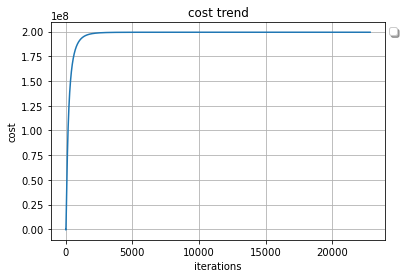

This is for y_train
Training Accuracy: 0.8923910639239107
Training Precision: 0.6317016317016317
Training Recall: 0.19215315528243915
Training f1score: 0.2946719826023922
This is for y_test
Training Accuracy: 0.8914077186774301
Training Precision: 0.6217948717948718
Training Recall: 0.1833648393194707
Training f1score: 0.2832116788321168


In [6]:
lr=LogisticRegression(marketing_X,marketing_y,tolerance=0.0001,learningRate=0.000001)
lr.runModel()

In [33]:
class LogisticRegression_withSMOTE:
    
    """Class that performs Logistic Regression with SMOTE, addressing the class imbalance problem:
    ---------------
    Parameters:
    X-features
    y-target variable
    learningRate-0.000001
    tolerance-0.0001
    
    """
    
    def __init__(self,X,y, learningRate,tolerance, maxIteration=50000):
        
        self.X=X
        self.y=y
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        
    def normalize(self,X):
        
        '''function to scale the train data'''
        
        mean=np.mean(X)
        std=np.std(X)
        X_norm=(X-mean)/std
        X_norm=self.addX0(X_norm)
        
        return X_norm,mean,std
    
    def normalizeTestData(self,X_test,train_mean,train_std):
        
        '''function to scale the test data'''
        
        X_norm=(X_test-train_mean)/train_std
        X_norm=self.addX0(X_norm)
        
        return X_norm
        
    
    def addX0(self,X):
        
        '''function to add bias to the dataset'''
        
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    
    
    def sigmoid(self,z):
        
        '''function for calculating the probability of belonging to a particular class'''
        
        sig=1/(1+np.exp(-z))
        return sig
    
    def costFunction(self,X,y):
        
        '''function for returning the cost of the model'''
        
#         #approach 1
        
        pred_=np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w))) - X.dot(self.w).dot(y) #negative log-likelihood
        cost=pred_.sum()
        
        #approach 2
#         sig=self.sigmoid(X.dot(self.w))
#         pred_= y * np.log(sig) + (1-y) * np.log(1-sig)
#         cost= pred_.sum()
        
        return cost
    
    def gradient(self,X,y):
        
         '''function for calculationg the gradient'''
        
        sig=self.sigmoid(X.dot(self.w))
        grad=(sig-y).dot(X)
        return grad
    
    def gradientDescent (self,X,y):
        
        '''function which runs the gradient descent algorithm for logistic regression'''
        
        costSequence=[]
        lastCost=float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            
            self.w=self.w-self.learningRate*self.gradient(X,y)
            
            currentCost = self.costFunction(X,y)
            diff = lastCost-currentCost
            
            lastCost=currentCost
            costSequence.append(currentCost)
            
            if abs(diff) < self.tolerance:
                print("The Model Stopped - No Further Improvement")
                break
                
        self.plotCost(costSequence)
        
        return
        
    def plotCost(self,costSequence):
        
        '''function to plot the cost of the model'''
        
        s=np.array(costSequence)
        t=np.arange(s.size)
        
        fig,ax=plt.subplots()
        ax.plot(t,s)
        
        ax.set(xlabel='iterations',ylabel='cost',title='cost trend')
        ax.grid()
        
        plt.legend(bbox_to_anchor=(1.05,1),shadow=True)
        plt.show()
        
    def predict(self,X):
        
        '''function to return the predicted classes'''
        
        sig=self.sigmoid(X.dot(self.w))
        
        return np.around(sig)
    
    def evaluate(self,y,y_hat):
        
        '''fucntion to evaluate the performance of the model'''
        
        y=(y==1)
        y_hat=(y_hat == 1)
        
        accuracy= ( y == y_hat).sum()/y.size
        precision=(y & y_hat).sum() /y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        f1score=2*(precision*recall)/(precision+recall)
        
        return accuracy,precision,recall,f1score
    
    def runModel(self):
        
        '''function to run the model'''
        
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,stratify=self.y,test_size=0.2,random_state=0)
        
        #normalizing the data
        self.X_train,self.mean,self.std=self.normalize(self.X_train)
        self.X_test=self.normalizeTestData(self.X_test,self.mean,self.std)
        
        #solving class imbalance using SMOTE
        smote = SMOTETomek(random_state=101)
        self.X_train,self.y_train = smote.fit_resample(self.X_train,self.y_train)
        
        self.w = np.ones(self.X_train.shape[1],dtype=np.float64)*0
        self.gradientDescent(self.X_train,self.y_train)
        
       
        
        y_hat_train = self.predict(self.X_train)
        accuracy,precision,recall,f1score=self.evaluate(self.y_train,y_hat_train)
        print('This is for y_train')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)
        
        y_hat_test = self.predict(self.X_test)
        accuracy,precision,recall,f1score=self.evaluate(self.y_test,y_hat_test)
        print('This is for y_test')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)
        
        
        
        

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [13:12<00:00, 63.09it/s]
No handles with labels found to put in legend.


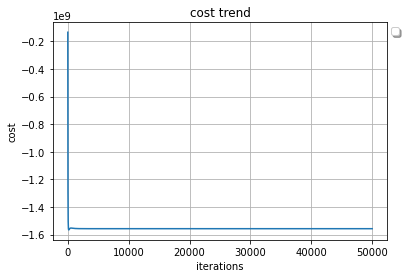

This is for y_train
Training Accuracy: 0.7161842229868367
Training Precision: 0.7446154945172697
Training Recall: 0.6580700148363269
Training f1score: 0.698672833299819
This is for y_test
Training Accuracy: 0.7601459692579896
Training Precision: 0.2760983474405482
Training Recall: 0.6474480151228733
Training f1score: 0.38711500423848544


In [34]:
lr=LogisticRegression_withSMOTE(marketing_X,marketing_y,tolerance=0.0001,learningRate=0.000001)
lr.runModel()

In [7]:
class SoftMarginSVM:
    
    """Class that performs Soft margin SVM:
    ---------------
    Parameters:
    X-features
    y-target variable
    alpha-lagrangian multiplier
    w-weights(parameters which are learnt)
    C-regularization term
    
    """
    
    def __init__(self,X,y,C):
        self.alpha = None
        self.w = None
        self.supportVectors = None
        self.X=X
        self.y=y
        self.C = C
        
    def normalize(self,X):
        
        '''function to scale the train data'''
        
        mean=np.mean(X)
        std=np.std(X)
        X_norm=(X-mean)/std
        X_norm=self.addX0(X_norm)
        
        return X_norm,mean,std
    
    def normalizeTestData(self,X_test,train_mean,train_std):
        
        '''function to scale the test data'''
        
        X_norm=(X_test-train_mean)/train_std
        X_norm=self.addX0(X_norm)
        
        return X_norm
        
    
    def addX0(self,X):
        
        ''' function to add bias to the dataset'''
        
        return np.column_stack([np.ones([X.shape[0],1]),X])
                

                

    def fit(self, X, y):
        
        '''function for fitting the model'''

        N = len(y)

        # Gram matrix of (X,y)
        Xy = X*y[:,np.newaxis] 

        GramXy = np.matmul(Xy,Xy.T) 
    
        def Ld0(G, alpha): 
            
            '''function to calculate the dual form of SVM'''
            obj_fn = alpha.sum() - 0.5*alpha.dot(alpha.dot(G))

            return obj_fn
        

            # Derivative of Lagrangian Function
        def partialDerivationLd0(G, alpha):
            
            '''function to calculate derivative of lagrangian function'''
            
            par_der = np.ones_like(alpha) - alpha.dot(G)
            return par_der

        alpha = np.ones(N)

        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C * np.ones(N)))

        constraints = ({'type': 'eq', 'fun':lambda a: np.dot(a,y), 'jac': lambda a: y },
                    {'type': 'ineq', 'fun':lambda a: b - np.dot(A, a), 'jac': lambda a: -A}) 

        optRes = optimize.minimize(fun = lambda a: -Ld0(GramXy, a),
                                x0 = alpha,
                                method = 'SLSQP',
                                jac = lambda a: - partialDerivationLd0(GramXy, a),
                                constraints = constraints)
        
        self.alpha = optRes.x


        self.w =  np.sum(( self.alpha[:, np.newaxis] * Xy), axis = 0)

        epsilon = 1e-4
        self.supportVectors = X[ self.alpha > epsilon]
        self.supportLabels = y[self.alpha > epsilon]


        self.b1 = self.supportLabels[0] - np.matmul(self.supportVectors[0].T, self.w)
        
        b = []
        for i in tqdm(range(len(self.supportLabels))):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            b.append( b_i )
        
        self.b2 = sum(b)/len(b)
        
        self.intercept = self.b2
        
    def predict(self, X):
        
        '''function to return the predicted classes'''
    
        return 2*(np.matmul(X, self.w) + self.intercept > 0) - 1
    
    def evaluate(self,y,y_hat):
        
        '''function to evaluate the performance of the model'''
        
        y=(y==1)
        y_hat=(y_hat == 1)
        
        accuracy= ( y == y_hat).sum()/y.size
        precision=(y & y_hat).sum() /y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        f1score=2*(precision*recall)/(precision+recall)
        
        return accuracy,precision,recall,f1score
    
    def runModel(self):
        
        '''function to run the model'''
        
        #solving class imbalance using SMOTE
        
        smote=SMOTETomek(random_state=42)
        self.X,self.y= smote.fit_resample(self.X,self.y)
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,test_size=0.2,random_state=0)
        
        #normalizing the data
        self.X_train,self.mean,self.std=self.normalize(self.X_train)
        self.X_test=self.normalizeTestData(self.X_test,self.mean,self.std)
        
        self.fit(self.X_train,self.y_train)
        
        y_hat_train = self.predict(self.X_train)
        print('This is y_hat_train:', y_hat_train)
        accuracy,precision,recall,f1score=self.evaluate(self.y_train,y_hat_train)
        print('This is for y_train')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)
        
        y_hat_test = self.predict(self.X_test)
        print('This is y_hat_test:', y_hat_test)
        accuracy,precision,recall,f1score=self.evaluate(self.y_test,y_hat_test)
        print('This is for y_test')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)
        
        
    
    

In [ ]:
model = SoftMarginSVM(marketing_X.values[:2500, :],marketing_y.values[:2500],C=1)
model.runModel()

In [27]:
class SoftMarginSVM_kernel:
    
    
    """Class that performs Soft margin SVM:
    ---------------
    Parameters:
    X-features
    y-target variable
    alpha-lagrangian multiplier
    w-weights(parameters which are learnt)
    C-regularization term
    
    """
    def __init__(self,X,y,C):
        self.alpha = None
        self.w = None
        self.supportVectors = None
        self.X=X
        self.y=y
        self.C = C
    def kernel_helper(self, xa, xb):
        
        '''function to calculate the RBF kernel'''
        p=(xa-xb)
        pa=p.T.dot(p)
        return int(pa)
        
    def Kernel(self,X):
        
        '''function to calculate the RBF kernel'''
        oper=0
        std=0.1
        for i in range(len(X)):
            for j in range(len(X)):
                xi=X[i]
                xj=X[j]
                oper+=self.kernel_helper(xi,xj)
        oper=oper/2*std*std
        return np.exp(-oper)
    
    def normalize(self,X):
        
        '''function to scale the train data'''
        
        mean=np.mean(X)
        std=np.std(X)
        X_norm=(X-mean)/std
        X_norm=self.addX0(X_norm)
        
        return X_norm,mean,std
    
    def normalizeTestData(self,X_test,train_mean,train_std):
        
        '''function to scale the train data'''
        
        X_norm=(X_test-train_mean)/train_std
        X_norm=self.addX0(X_norm)
        
        return X_norm
        
    
    def addX0(self,X):
        
        '''function to add bias to the dataset'''
        
        return np.column_stack([np.ones([X.shape[0],1]),X])
                

    def fit(self, X, y):
        
        '''function to fit the model'''

        N = len(y)

#         # Gram matrix of (X,y)
        Xy = X*y[:,np.newaxis] 

        GramXy = y.T.dot(y)
        GramXy*=self.Kernel(X)
    
        def Ld0(G, alpha):
            
            '''function to calculate the dual form of SVM'''
            obj_fn = alpha.sum() - 0.5*alpha.dot(alpha.dot(G))

            return obj_fn
        

            # Derivative of Lagrangian Function
        def partialDerivationLd0(G, alpha):
            
            '''function to calculate derivative of lagrangian function'''
            par_der = np.ones_like(alpha) - alpha.dot(G)
            return par_der

        alpha = np.ones(N)

        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C * np.ones(N)))

        constraints = ({'type': 'eq', 'fun':lambda a: np.dot(a,y), 'jac': lambda a: y },
                    {'type': 'ineq', 'fun':lambda a: b - np.dot(A, a), 'jac': lambda a: -A}) 

        optRes = optimize.minimize(fun = lambda a: -Ld0(GramXy, a),
                                x0 = alpha,
                                method = 'SLSQP',
                                jac = lambda a: - partialDerivationLd0(GramXy, a),
                                constraints = constraints)
        
        self.alpha = optRes.x


        self.w =  np.sum(( self.alpha[:, np.newaxis] * Xy), axis = 0)

        epsilon = 1e-4
        self.supportVectors = X[ self.alpha > epsilon]
        self.supportLabels = y[self.alpha > epsilon]


        self.b1 = self.supportLabels[0] - np.matmul(self.supportVectors[0].T, self.w)
        
        b = []
        for i in tqdm(range(len(self.supportLabels))):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            b.append( b_i )
        
        self.b2 = sum(b)/len(b)
        
        self.intercept = self.b2
        
    def predict(self, X):
        
        '''function to return the predicted classes'''
    
        return 2*(np.matmul(X, self.w) + self.intercept > 0) - 1
    
    def evaluate(self,y,y_hat):
        
        '''function to evaluate the performance of the model'''
        
        y=(y==1)
        y_hat=(y_hat == 1)
        
        accuracy= ( y == y_hat).sum()/y.size
        precision=(y & y_hat).sum() /y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        f1score=2*(precision*recall)/(precision+recall)
        
        return accuracy,precision,recall,f1score
    
    def runModel(self):
        
        '''function to run the model'''
        
        
        #solving class imbalance using SMOTE
        
        smote=SMOTETomek(random_state=42)
        self.X,self.y= smote.fit_resample(self.X,self.y)
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,test_size=0.2,random_state=0)
        
        #normalizing the data
        self.X_train,self.mean,self.std=self.normalize(self.X_train)
        self.X_test=self.normalizeTestData(self.X_test,self.mean,self.std)
        
        self.fit(self.X_train,self.y_train)
        
        y_hat_train = self.predict(self.X_train)
        print('This is y_hat_train:', y_hat_train)
        accuracy,precision,recall,f1score=self.evaluate(self.y_train,y_hat_train)
        print('This is for y_train')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)
        
        y_hat_test = self.predict(self.X_test)
        print('This is y_hat_test:', y_hat_test)
        accuracy,precision,recall,f1score=self.evaluate(self.y_test,y_hat_test)
        print('This is for y_test')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)
        
        
        
        
        
        
        

In [28]:
model1 = SoftMarginSVM_kernel(marketing_X.values[:2500, :],marketing_y.values[:2500],C=1)
model1.runModel()


100%|██████████████████████████████████████████████████████████████████████████| 1957/1957 [00:00<00:00, 191633.86it/s]

This is y_hat_train: [ 1 -1  1 ...  1 -1 -1]
This is for y_train
Training Accuracy: 0.4962868117797695
Training Precision: 0.49501835343471423
Training Recall: 0.48459958932238195
Training f1score: 0.4897535667963684
This is y_hat_test: [-1 -1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1  1
  1 -1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1 -1  1  1 -1  1 -1  1 -1 -1  1 -1
 -1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1  1 -1  1 -1  1
  1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1  1 -1 -1  1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1 -1  1  1  1 -1 -1  1
 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1  1 -1
 -1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1 -1
 -1  1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1  1 -1  1 -1
 -1 -1 -1 -1  1  1  1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1  1  1 -1 -1
  1  1 -1  1 -1  1 -1 -1  1  1 -1